<a href="https://colab.research.google.com/github/smnieee/ml_workshop/blob/master/session5/1_FunWithNeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fun with Neural Networks

---

## Southern Minnesota IEEE: Machine Learning Workshop 5
## May 16, 2022

In [24]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers

## Simple Perceptron Example (Classification)

The perceptron is the basic unit of the neural network. It takes multiple inputs and produces one output. The inputs are adjusted with weights, $w$, and biases, $b$. The output is a result of an activation function being applied to the sum of the adjusted inputs.

In [25]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [27]:
# Load data and view them
iris = load_iris()

iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

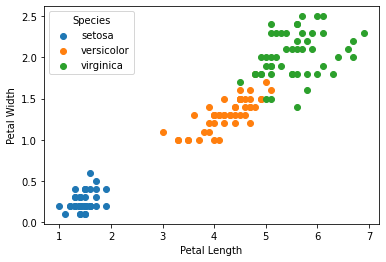

In [63]:
# Let's look at petal length and width
X = iris.data[:, 2:4]

# Plot the data
fig, ax = plt.subplots()
for lbl,name in enumerate(iris.target_names):
  ax.scatter(X[(iris.target==lbl),0], X[(iris.target==lbl),1],
             label=name)

ax.legend(title='Species')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
plt.show()

In [41]:
# Binary targets: it's either Setosa or not
y = (iris.target == 0).astype(int)

In [65]:
# Create a Perceptron from Scikit-Learn and use it to predict setosa
is_setosa = Perceptron()
is_setosa.fit(X,y)

y_pred = is_setosa.predict([[3.,1.]])
y_pred.astype(bool)

array([False])

## Linear Regression Example

The petal length versus width appears to be linear. This can also be approximated with a simple network.

Coefficient:  [[0.41575542]]
Intercept:  [-0.36307552]


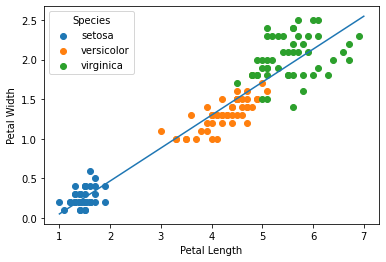

In [79]:
from sklearn import linear_model
petal_regression = linear_model.LinearRegression()

x_linreg = X[:,0].reshape(-1,1)
y_linreg = X[:,1].reshape(-1,1)

petal_regression.fit(x_linreg,y_linreg)

new_X = np.linspace(1,7).reshape(-1,1)
new_Y = petal_regression.predict(new_X)

print("Coefficient: ", petal_regression.coef_)
print("Intercept: ", petal_regression.intercept_)

# Plot the data
fig, ax = plt.subplots()
for lbl,name in enumerate(iris.target_names):
  ax.scatter(X[(iris.target==lbl),0], X[(iris.target==lbl),1],
             label=name)

ax.legend(title='Species')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

ax.plot(new_X, new_Y)
plt.show()


## Full Classification Example (Keras)

